# Exercícios Pandas

In [25]:
import pandas as pd

In [26]:
#Criando dicionário
dic = {'col1':[1,2,3,4,5], 'col2': [5,4,3,2,1]}

In [27]:
#Criando o dataframe a partir do dicionario criado acima
df = pd.DataFrame(dic)

In [28]:
df

,col1,col2
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


In [29]:
#Criando um numpy array
import numpy as np
array = np.array([[1,2,3,4,5], [5,4,3,2,1]])
array = array.T

In [40]:
#Criando o dataframe a partir do array criado acima e definindo os nomes das colunas
df2 = pd.DataFrame(array, columns=('col1','col2'))

In [41]:
df2

,col1,col2
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


Crie um DataFrame a partir do banco de dados sintético criado no curso de numpy.

In [44]:
data = np.random.random((100,4))

In [47]:
df3 = pd.DataFrame(data, columns=('coluna1','coluna2','coluna3','coluna4'))
df3.head()

,coluna1,coluna2,coluna3,coluna4
0,0.984881,0.387123,0.926324,0.307606
1,0.947156,0.263945,0.592952,0.627624
2,0.672400,0.512815,0.922006,0.259857
3,0.796655,0.494930,0.802754,0.275007
4,0.145826,0.204633,0.222103,0.185289


In [53]:
#Transformando o df3 em uma numpy array
df3_array = df3.values

# Exercício importaçao 

Importe o arquivo data/jura.csv como um DataFrame;
Use o método head para checar se está tudo OK. 

In [65]:
#Importando
jura = pd.read_csv('data\jura.csv')

In [66]:
#Verificando
jura.head(3)

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn
0,238.6,307.7,3,3,1.740,9.32,38.32,25.72,21.32,77.36,92.56
1,254.4,197.2,2,2,1.335,10.00,40.20,24.76,29.72,77.88,73.56
2,280.7,334.7,2,3,1.610,10.60,47.00,8.88,21.40,30.80,64.80


# exercicio

* Filtre somente as colunas contínuas, com exceção de X e Y;
* Use o método describe no dataframe filtrado;
* Crie um objeto groupby a partir da variável Rock e use o método describe nesse objeto;
* Imprima o intervalo entre as linhas 40 e 50 da variável Rock.
* Crie uma nova coluna que é a variável Cd capeada no P90. dica: np.where()
* Exporte em formato csv o novo dataset.

In [108]:
#Filtrando somente colunas continuas
filtro = jura[['Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']]

In [109]:
#Verificando
filtro.head()

,Cd,Co,Cr,Cu,Ni,Pb,Zn
0,1.740,9.32,38.32,25.72,21.32,77.36,92.56
1,1.335,10.00,40.20,24.76,29.72,77.88,73.56
2,1.610,10.60,47.00,8.88,21.40,30.80,64.80
3,2.150,11.92,43.52,22.70,29.72,56.40,90.00
4,1.565,16.32,38.52,34.32,26.20,66.40,88.40


In [110]:
#Usando o método describe
filtro.describe()

,Cd,Co,Cr,Cu,Ni,Pb,Zn
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,1.309077,9.302579,35.070116,23.727490,19.730347,53.916602,75.078301
std,0.915188,3.576046,10.957509,20.712635,8.232858,29.792158,29.019291
min,0.135000,1.552000,8.720000,3.960000,4.200000,18.960000,25.200000
25%,0.637500,6.520000,27.440000,11.020000,13.800000,36.520000,55.000000
50%,1.070000,9.760000,34.840000,17.600000,20.560000,46.400000,73.560000
75%,1.715000,11.980000,42.220000,27.820000,25.420000,60.400000,89.920000
max,5.129000,17.720000,67.600000,166.400000,53.200000,229.560000,219.320000


In [111]:
#Grouping by Rock
rock_groups = jura[['Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn', 'Rock']].groupby('Rock')
rock_groups.describe()

Cd                                                             Co  \
     count      mean       std    min     25%    50%     75%    max count   
Rock                                                                        
1     53.0  1.141000  1.272676  0.135  0.3550  0.580  1.4250  5.129  53.0   
2     85.0  1.346576  0.697658  0.220  0.8100  1.305  1.7400  4.180  85.0   
3     63.0  1.504952  0.979067  0.280  0.7975  1.215  1.9165  4.020  63.0   
4      3.0  1.850000  0.870790  1.100  1.3725  1.645  2.2250  2.805   3.0   
5     55.0  1.159218  0.665111  0.275  0.5560  1.060  1.5665  3.155  55.0   

                  ...       Pb            Zn                               \
           mean   ...      75%     max count       mean        std    min   
Rock              ...                                                       
1      5.393887   ...    46.80  141.00  53.0  60.101887  31.395137  27.20   
2     11.048941   ...    63.92  172.12  85.0  77.084706  22.929036  28.88   
3      9.975238   ...    67.20  229.56  63.0  82.747302  28.960698  43.72   
4      9.373333   ...    55.80   67.60   3.0  66.666667  23.218384  44.00   
5      9.595855   ...    64.00  116.48  55.0  78.083636  31.069684  25.20   

                                
       25%   50%   75%     max  
Rock                            
1     39.8  47.6  66.8  145.60  
2     63.6  74.4  86.0  166.28  
3     63.4  79.6  95.7  219.32  
4     54.8  65.6  78.0   90.40  
5     59.2  76.0  88.8  151.60  

[5 rows x 56 columns]

In [112]:
#Imprimindo linhas de 40 a 50 da voluna Rock
jura.loc[40:50]['Rock']

40    3
41    3
42    5
43    3
44    3
45    1
46    3
47    3
48    5
49    3
50    5
Name: Rock, dtype: int64

In [113]:
#Criando uma nova coluna com os valores de Cd capeados pelo p90
p90 = np.percentile(jura['Cd'], 90)
jura['Cd_cap'] = np.where(jura['Cd']<p90, jura['Cd'], p90)
p90

2.2926000000000024

In [114]:
#Verificando
jura.Cd_cap.max(axis=0)

2.2926000000000024

In [115]:
#Verificando
jura.head(3)

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn,Cd_cap
0,238.6,307.7,3,3,1.740,9.32,38.32,25.72,21.32,77.36,92.56,1.740
1,254.4,197.2,2,2,1.335,10.00,40.20,24.76,29.72,77.88,73.56,1.335
2,280.7,334.7,2,3,1.610,10.60,47.00,8.88,21.40,30.80,64.80,1.610


In [116]:
#Exportando
jura.to_csv('exercicios_export.csv')

# exercício de visualização 

EDA no jura. Se familiarizem com as funções de plot. Usem a função mapa de amostras da aula de plotagem.

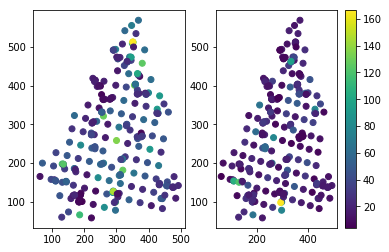

In [127]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
axes[0].scatter(jura['Xloc'], jura['Yloc'], c=jura['Cd'])
subfig = axes[1].scatter(jura['Xloc'], jura['Yloc'], c=jura['Cu'])
fig.colorbar(subfig)
plt.show()

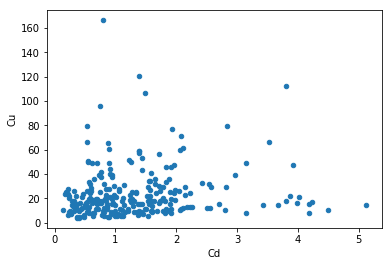

In [128]:
jura.plot(kind='scatter', x='Cd', y='Cu')

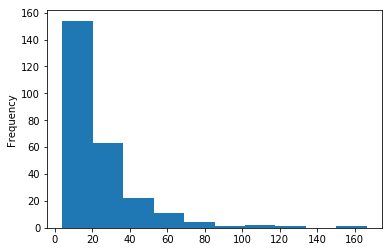

In [129]:
jura['Cu'].plot(kind='hist')

In [130]:
variables = ('Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn')

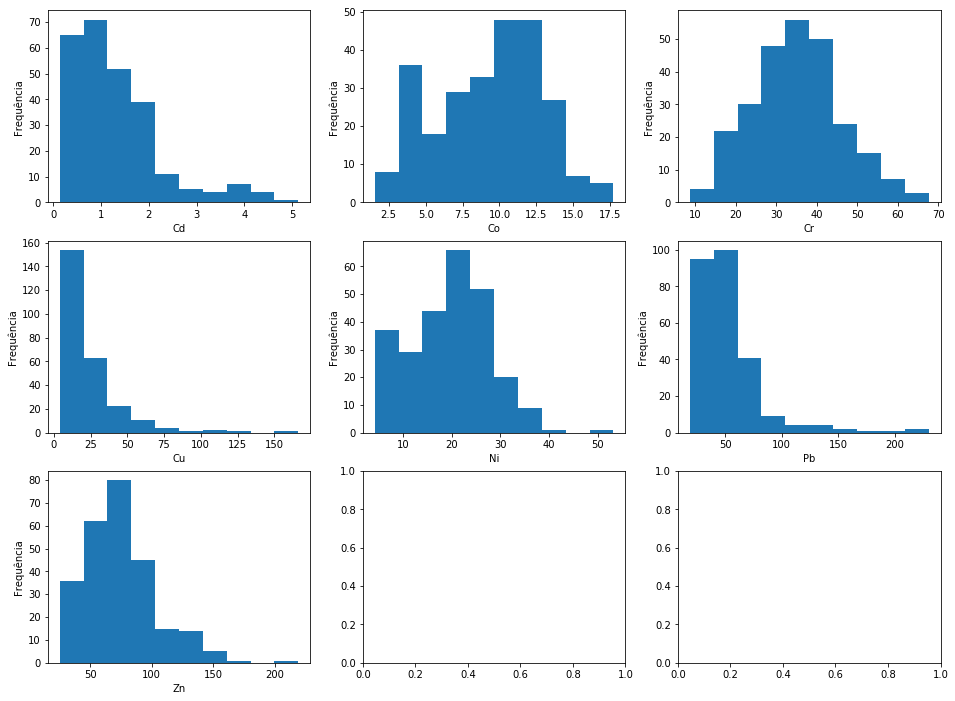

In [131]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
for ax, var, title in zip(axes, variables, variables):
    ax.hist(data[var])
    #ax.set_title(var)
    ax.set_ylabel('Frequência')
    ax.set_xlabel(var)